# Задание 1**
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd

In [6]:
movies = pd.read_csv('ml-latest-small/ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings = pd.read_csv('ml-latest-small/ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [29]:
# Сгруппируем данные по столбцу movieId и посчитаем среднее значение всех выставленных оценок. 
# В итоговой таблице оставим только столбцы с ID фильма и его средним рейтингом
mean_rating = ratings.groupby('movieId').mean().reset_index()
mean_rating = mean_rating[ ['movieId', 'rating'] ]
mean_rating.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857


In [37]:
def classification_rating(data_):
    """ Классификация рейтинга"""
    if data_ <= 2:
        return 'Низкий рейтинг'
    elif 2 < data_ <= 4:
        return 'Средний рейтинг'
    else:
        return 'Высокий рейтинг'

In [40]:
mean_rating['class'] = mean_rating['rating'].apply(classification_rating)
mean_rating.head()

,movieId,rating,class
0,1,3.872470,Средний рейтинг
1,2,3.401869,Средний рейтинг
2,3,3.161017,Средний рейтинг
3,4,2.384615,Средний рейтинг
4,5,3.267857,Средний рейтинг


In [45]:
# прибавил столбцы с названием фильма и его жанрами
mean_rating.merge(movies, on = 'movieId', how = 'left' ).head()

,movieId,rating,class,title,genres
0,1,3.872470,Средний рейтинг,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.401869,Средний рейтинг,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.161017,Средний рейтинг,Grumpier Old Men (1995),Comedy|Romance
3,4,2.384615,Средний рейтинг,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.267857,Средний рейтинг,Father of the Bride Part II (1995),Comedy


# Задание 2
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [121]:
keywords = pd.read_csv('ml-latest-small/ml-latest-small/keywords.csv')
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [151]:
def city_region(request_):
    """Функция по гео-классификации поисковых запросов"""
    geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск'] }
    
    result = 'undefined'
    
    for x, y in geo_data.items():
        if request_ in y:
            return x
    return result

In [152]:
# Применим функцию city_region к keywords
keywords['region'] = keywords['keyword'].apply(city_region)
keywords.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [153]:
keywords['region'].value_counts()

undefined         99991
Центр                 3
Северо-Запад          3
Дальний Восток        3
Name: region, dtype: int64

# Задание 3 (бонусное)
Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

Важно! При копировании юпитер ноутбука изменяет кавычки ’ на ` , что может способствовать ошибки в коде. В данной ситуации необходимо их просто заменить.

In [2]:
ratings_all = pd.read_csv('ml-latest/ratings.csv')
ratings_all.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [3]:
movies_all = pd.read_csv('ml-latest/movies.csv')
movies_all.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# в переменную year записал значения с 1930 по 2021, т.к. есть фильмы и позже 2010 и раннее 1950 гг. 
years = list(range(1930,2021))

In [5]:
def production_year(title):
    """Функция для определения года производства фильма"""
    for year_ in years:
        if str(year_) in title:
            return year_
    return 1900

In [6]:
movies_all['year_'] = movies_all['title'].apply(production_year)
movies_all.tail()

,movieId,title,genres,year_
58093,193876,The Great Glinka (1946),(no genres listed),1946
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011
58095,193880,Her Name Was Mumu (2016),Drama,2016
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017
58097,193886,Leal (2018),Action|Crime|Drama,2018


In [7]:
# не нужно

ratings_all_edit = ratings_all.merge(movies_all, on = 'movieId', how = 'left')

In [8]:
rating_mean_years = ratings_all_edit.groupby('year_').mean()


In [19]:
result_table = rating_mean_years['rating'].reset_index()

In [46]:
result_table.sort_values('rating', ascending = False).head(50)

,year_,rating
28,1957,3.996580
17,1946,3.979485
25,1954,3.970365
43,1972,3.969146
13,1942,3.957692
5,1934,3.939002
15,1944,3.926020
33,1962,3.925539
2,1931,3.920417
12,1941,3.896968


# Вывод
В топ-50 по рейтингу по годам не попало ни одного года начиная с 2000-ых годов, в топ-60 уже попадают года после 2000 года. У фильмов снятых в 20 веке средняя оценка выше, чем у фильмов снятых после 2000 года.
Для наглядности нарисуем линейный график.

In [16]:
import matplotlib.pyplot as plt

In [31]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()

    # укажем толщину графика и цвет линии
    ax.plot(x_data, y_data, lw = 2, color = '#539caf')

    # обозначим оси и их названия
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

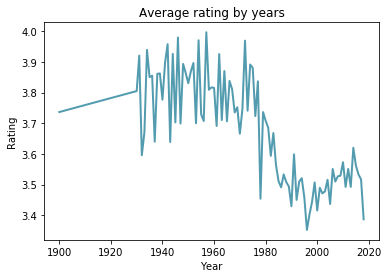

In [32]:
lineplot(result_table['year_'], result_table['rating'], 'Year', 'Rating', 'Average rating by years')

Судя по графику наблюдается тенденция к снижению средней оценки начиная с 70-ых годов, но после 2000 года также можем наблюдать рост средней оценки.